In [161]:
#### Load Data
## refer by  : https://www.analyticsvidhya.com/blog/2018/08/k-nearest-neighbor-introduction-regression-python/
#######################################

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


df = pd.read_csv('file_price_house/train_clean.csv')
df_test = pd.read_csv('file_price_house/test_clean.csv')

#df_train = pd.read_csv('file_price_house/train.csv')
#df_test = pd.read_csv('file_price_house/test_clean.csv')
#print(df.feature_names)



df.head()


,Unnamed: 0,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [162]:
df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
print("----------------------------------------")
print("### numeric columns -> ",len(numeric_cols))
print(numeric_cols) 





----------------------------------------
### numeric columns ->  39
['Unnamed: 0' 'Id' 'MSSubClass' 'LotFrontage' 'LotArea' 'OverallQual'
 'OverallCond' 'YearBuilt' 'YearRemodAdd' 'MasVnrArea' 'BsmtFinSF1'
 'BsmtFinSF2' 'BsmtUnfSF' 'TotalBsmtSF' '1stFlrSF' '2ndFlrSF'
 'LowQualFinSF' 'GrLivArea' 'BsmtFullBath' 'BsmtHalfBath' 'FullBath'
 'HalfBath' 'BedroomAbvGr' 'KitchenAbvGr' 'TotRmsAbvGrd' 'Fireplaces'
 'GarageYrBlt' 'GarageCars' 'GarageArea' 'WoodDeckSF' 'OpenPorchSF'
 'EnclosedPorch' '3SsnPorch' 'ScreenPorch' 'PoolArea' 'MiscVal' 'MoSold'
 'YrSold' 'SalePrice']


In [163]:
#Create train and test set
#########################
from sklearn.model_selection import train_test_split
train , test = train_test_split(df_numeric, test_size = 0.3) 


x_train = train.drop('SalePrice', axis=1)
y_train = train['SalePrice']

x_test = test.drop('SalePrice', axis = 1)
y_test = test['SalePrice']
  

#x_train.head()
print(x_train.shape)
#y_train.head()
print(y_train.shape)
#x_test.head()
print(x_test.shape)
#y_test.head()
print(y_test.shape)



(1022, 38)
(1022,)
(438, 38)
(438,)


In [164]:
x_train.head()

,Unnamed: 0,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
260,260,261,80,120.0,19296,6,5,1962,1962,399.0,...,884,0,0,252,0,0,0,0,5,2009
641,641,642,60,69.0,7050,7,5,2001,2001,0.0,...,650,0,235,0,0,0,0,0,5,2007
648,648,649,60,70.0,7700,6,5,1966,1966,351.0,...,442,0,124,216,0,0,0,0,6,2010
41,41,42,20,115.0,16905,5,6,1959,1959,0.0,...,308,0,104,0,0,0,0,0,7,2007
1337,1337,1338,30,153.0,4118,4,4,1941,1950,0.0,...,0,0,20,0,0,0,0,0,3,2006


In [165]:
x_test.head()

,Unnamed: 0,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
1245,1245,1246,80,78.0,12090,6,7,1984,2003,74.0,...,477,268,112,0,0,147,0,0,1,2007
807,807,808,70,144.0,21384,5,6,1923,2004,0.0,...,528,0,312,0,0,0,0,0,5,2009
1145,1145,1146,50,52.0,6240,5,6,1928,1950,0.0,...,225,0,0,0,0,0,0,0,8,2006
1134,1134,1135,60,57.0,8773,6,5,1997,1997,0.0,...,460,100,38,0,0,0,0,0,8,2007
1108,1108,1109,60,69.0,8063,6,5,2000,2000,0.0,...,463,100,48,0,0,0,0,0,11,2007


In [166]:
# Preprocessing – Scaling the features
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled)

x_test_scaled = scaler.fit_transform(x_test)
x_test = pd.DataFrame(x_test_scaled)

In [167]:
#Let us have a look at the error rate for different k values
#import required packages
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(x_train, y_train)  #fit the model
    pred=model.predict(x_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 54382.099235798516
RMSE value for k=  2 is: 46160.62541501045
RMSE value for k=  3 is: 45635.17282059754
RMSE value for k=  4 is: 45348.2499377361
RMSE value for k=  5 is: 46374.49643984628
RMSE value for k=  6 is: 46311.44196473542
RMSE value for k=  7 is: 46192.264059021596
RMSE value for k=  8 is: 45972.40331955519
RMSE value for k=  9 is: 45605.07604952889
RMSE value for k=  10 is: 45433.85126002181
RMSE value for k=  11 is: 45169.920043520004
RMSE value for k=  12 is: 45050.61402954801
RMSE value for k=  13 is: 45355.23620495636
RMSE value for k=  14 is: 45300.43908765396
RMSE value for k=  15 is: 45533.896377797806
RMSE value for k=  16 is: 45414.66950027577
RMSE value for k=  17 is: 45394.32314297625
RMSE value for k=  18 is: 45556.25884142929
RMSE value for k=  19 is: 45486.2414657371
RMSE value for k=  20 is: 45451.43488358301


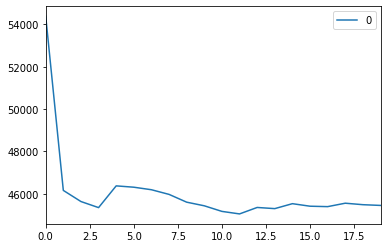

In [168]:
#plotting the rmse values against k values
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

In [170]:
### จากกราฟเราเลือก k = 10 เพราะ มองว่า stable มากสุด
####################################################
train_ID = df['Id']
test_ID = df_test['Id']

#  drop the 'Id'   ไม่จำเป็น
df.drop("Id", axis = 1, inplace = True)
df_test.drop("Id", axis = 1, inplace = True)

# Check data size after dropping the 'Id' variable
print("\nThe Train Data size : {} ".format(df.shape)) 
print("The Test data size  : {} ".format(df_test.shape))



The Train Data size : (1460, 77) 
The Test data size  : (1459, 76) 


In [175]:
# ข้อมูล train
df.head()

,Unnamed: 0,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [177]:
#ข้อมูลที่ Test
df_test.head()

,Unnamed: 0,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,0,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,120,0,0,6,2010,WD,Normal
1,1,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,...,36,0,0,0,0,12500,6,2010,WD,Normal
2,2,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,...,34,0,0,0,0,0,3,2010,WD,Normal
3,3,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,...,36,0,0,0,0,0,6,2010,WD,Normal
4,4,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,...,82,0,0,144,0,0,1,2010,WD,Normal


In [191]:
 #Impute Missing Data and Clean Data
# Combining Datasets
ntrain = df.shape[0]
ntest = df_test.shape[0]
y_train = df.SalePrice.values
all_data = pd.concat((df, df_test)).reset_index(drop=True)
#all_data.drop(['SalePrice'], axis=1, inplace=True)
print("Train data size is : {}".format(df.shape))
print("Test data size is : {}".format(df_test.shape))
print("Combined dataset size is : {}".format(all_data.shape))

Train data size is : (1460, 77)
Test data size is : (1459, 76)
Combined dataset size is : (2919, 77)


C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [192]:
#show All data
all_data.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,...,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Unnamed: 0,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,3,1Fam,TA,No,706.0,0.0,GLQ,...,0,Pave,8,856.0,0,AllPub,0,2003,2003,2008
1,1262,0,0,3,1Fam,TA,Gd,978.0,0.0,ALQ,...,0,Pave,6,1262.0,1,AllPub,298,1976,1976,2007
2,920,866,0,3,1Fam,TA,Mn,486.0,0.0,GLQ,...,0,Pave,6,920.0,2,AllPub,0,2001,2002,2008
3,961,756,0,3,1Fam,Gd,No,216.0,0.0,ALQ,...,0,Pave,7,756.0,3,AllPub,0,1915,1970,2006
4,1145,1053,0,4,1Fam,TA,Av,655.0,0.0,GLQ,...,0,Pave,9,1145.0,4,AllPub,192,2000,2000,2008


In [207]:
 # all_data.select_dtypes(include=[np.number])
    
final_train = (all_data[:ntrain]).select_dtypes(include=[np.number]) #all_data[:ntrain]
final_test = (all_data[ntrain:]).select_dtypes(include=[np.number]) #all_data[ntrain:]




#df_numeric = df.select_dtypes(include=[np.number])
#train , test = train_test_split(df_numeric, test_size = 0.3) 

 
fx_train = final_train.drop('SalePrice', axis=1)
fy_train = final_train['SalePrice']

fx_test = final_test.drop('SalePrice', axis = 1)
fy_test = final_test['SalePrice'] 

 
#print("Train data size is : {}".format(final_train.shape))
#print("Test data size is : {}".format(final_test.shape)) 

fy_train.head()


0    208500.0
1    181500.0
2    223500.0
3    140000.0
4    250000.0
Name: SalePrice, dtype: float64

In [212]:

K = 10
model = neighbors.KNeighborsRegressor(n_neighbors = K)

model.fit(fx_train, fy_train)  #fit the model
pred2=model.predict(fx_test) #make prediction on test set
#error = sqrt(mean_squared_error(fy_test,pred)) #calculate rmse 
#print('RMSE value for k= ' , K , 'is:', error)
 
pred2.head()

#import pandas as pd 
#pd.DataFrame(pred).to_csv("file_price_house/submission_KNN.csv")

AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [109]:
print(df.shape) 
print(df_train.shape)
print(df.columns.values)

(1460, 78)
(1460, 81)
['Unnamed: 0' 'Id' 'MSSubClass' 'MSZoning' 'LotFrontage' 'LotArea'
 'Street' 'LotShape' 'LandContour' 'Utilities' 'LotConfig' 'LandSlope'
 'Neighborhood' 'Condition1' 'Condition2' 'BldgType' 'HouseStyle'
 'OverallQual' 'OverallCond' 'YearBuilt' 'YearRemodAdd' 'RoofStyle'
 'RoofMatl' 'Exterior1st' 'Exterior2nd' 'MasVnrType' 'MasVnrArea'
 'ExterQual' 'ExterCond' 'Foundation' 'BsmtQual' 'BsmtCond' 'BsmtExposure'
 'BsmtFinType1' 'BsmtFinSF1' 'BsmtFinType2' 'BsmtFinSF2' 'BsmtUnfSF'
 'TotalBsmtSF' 'Heating' 'HeatingQC' 'CentralAir' 'Electrical' '1stFlrSF'
 '2ndFlrSF' 'LowQualFinSF' 'GrLivArea' 'BsmtFullBath' 'BsmtHalfBath'
 'FullBath' 'HalfBath' 'BedroomAbvGr' 'KitchenAbvGr' 'KitchenQual'
 'TotRmsAbvGrd' 'Functional' 'Fireplaces' 'FireplaceQu' 'GarageType'
 'GarageYrBlt' 'GarageFinish' 'GarageCars' 'GarageArea' 'GarageQual'
 'GarageCond' 'PavedDrive' 'WoodDeckSF' 'OpenPorchSF' 'EnclosedPorch'
 '3SsnPorch' 'ScreenPorch' 'PoolArea' 'MiscVal' 'MoSold' 'YrSold'
 'SaleType' 

In [112]:
feature_cols =['MSSubClass','LotFrontage','LotArea','OverallQual','OverallCond','YearBuilt',
            'YearRemodAdd','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF',
            '2ndFlrSF','LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath',
            'BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','BsmtHalfBath','GarageYrBlt',
            'GarageCars','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea',
            'MiscVal','MoSold','GarageArea']




X = df[feature_cols] # Features
#y = df.above_200k # Target variable
y = df.SalePrice #Target
 # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

X_test = df_test

#Import knearest neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier

#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)

#print(y_train) 
#print(X_train)
#Train the model using the training sets
#เทรน
knn.fit(X_train, y_train)

#Predict the response for test dataset
#ทำนาย
y_pred = knn.predict(X_test)
#print('Predic n = 5')
print(y_pred)
 


#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy k=5:",metrics.accuracy_score(y_test, y_pred))


#test_ID = df['Id']
print(test_ID)
#print(len(y_pred))

#sub['Id'] = test_ID
#sub['SalePrice'] = y_pred
#sub.to_csv('file_price_house/submission_KNN.csv',index=False)

import pandas as pd 
pd.DataFrame(y_pred).to_csv("file_price_house/submission_KNN.csv")


ValueError: could not convert string to float: 'RH'

In [201]:
# ----------------------------------------------------------------------------
# lab6b.py written by Chakarida Nukoolkit
#                     adapted from DataCamp k-NN python tutorial:
#                     Src: https://www.datacamp.com/community/tutorials
#                                /k-nearest-neighbor-classification-scikit-learn
#
# Objectives:  To try out k-NNN library provided by sklearn
#
# Task#2 -- Try to run the given codes, observe result, then try to modify the code to 
#           change k values to other numbers (i.e, 1, 3, 9, etc...) until you get better
#           accuracy performance (closer toward 1.0 or 100%)
#
#---------------------------------------------------------------------------------
#Import scikit-learn dataset library
from sklearn import datasets

#Load wine dataset, provided with sklearn
wine = datasets.load_wine()

# print the names of the features
print(wine.feature_names)

# print the label species(class_0, class_1, class_2)
print(wine.target_names)

# print the wine data (top 5 records)
print(wine.data[0:5])

# print the wine labels (0:Class_0, 1:Class_1, 2:Class_3)
print(wine.target)

# print data(feature)shape
print(wine.data.shape)

# print target(or label)shape
print(wine.target.shape)

# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.3) # 70% training and 30% test

#Import knearest neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier

#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)

#Train the model using the training sets
knn.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = knn.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy k=5:",metrics.accuracy_score(y_test, y_pred))

#Import knearest neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier

#Create KNN Classifier
#knn = KNeighborsClassifier(n_neighbors=7)

#Train the model using the training sets
#knn.fit(X_train, y_train)

#Predict the response for test dataset
#y_pred = knn.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
#from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
#print("Accuracy k=7: ",metrics.accuracy_score(y_test, y_pred))


['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
['class_0' 'class_1' 'class_2']
[[1.423e+01 1.710e+00 2.430e+00 1.560e+01 1.270e+02 2.800e+00 3.060e+00
  2.800e-01 2.290e+00 5.640e+00 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 1.120e+01 1.000e+02 2.650e+00 2.760e+00
  2.600e-01 1.280e+00 4.380e+00 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 1.860e+01 1.010e+02 2.800e+00 3.240e+00
  3.000e-01 2.810e+00 5.680e+00 1.030e+00 3.170e+00 1.185e+03]
 [1.437e+01 1.950e+00 2.500e+00 1.680e+01 1.130e+02 3.850e+00 3.490e+00
  2.400e-01 2.180e+00 7.800e+00 8.600e-01 3.450e+00 1.480e+03]
 [1.324e+01 2.590e+00 2.870e+00 2.100e+01 1.180e+02 2.800e+00 2.690e+00
  3.900e-01 1.820e+00 4.320e+00 1.040e+00 2.930e+00 7.350e+02]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 